# load_digits

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

학습을 할 때 여러번 눌러서 결과를 확인해야했다. 좀 더 편하게 하기위해 반복문을 썼으나 실패했다. 반복할 때마다 tain과 test도 변해야하지만 실패했다. 여러가지 random을 써보았으나 방법을 찾지 못했다. 

각각 10번씩 해보니 svm의 accuracy 정확도가 가장 높이 나왔다.  따라서 svm의 정혹도가 가장 높다고 생각한다.

(1797, 64)
<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


<Figure size 432x288 with 0 Axes>

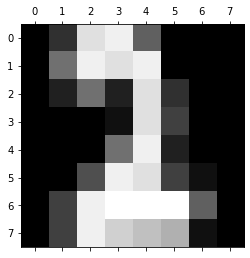

In [2]:
# https://url.kr/ye8q3o를 참조함.

digits = load_digits()
print(digits.data.shape) #총 1791개의 이미지가 있고 8x8로 이루어졌다.
print(type(digits))
print(digits.keys()) #data', 'target', 'frame', 'feature_names', 'target_names', 'images'이 있다.


plt.gray()
plt.matshow(digits.images[1780]) #그 중 1780번째의 이미지를 확인
plt.show() 

In [3]:
# 시각화
digits_data = digits.data  # feature_data 지정
digits_label = digits.target # Label Data 지정

print(digits.target.shape) 
print(digits.target_names) #Target Names 출력해 보기, 9개의 답.

digits_df = pd.DataFrame(data=digits_data,
                         columns=digits.feature_names)
digits_df["label"] = digits.target # 이것으로 0~9를 분류할 수 있다.

digits_df

# 앞서 1797의 이미지가 있고 이 이미지는 8X8이란 걸 알았고 표로 작성하였다. 

(1797,)
[0 1 2 3 4 5 6 7 8 9]


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


# load_digits의 5가지의 학습 모델 중 SVM의 accuracy가 가장 정확도가 높았다. 

In [4]:
# Decision Tree
from sklearn.model_selection import train_test_split



# 섞기 및 학습
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size =0.2, 
                                                    )

    print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
    X_train.shape, y_train.shape # 확인
    X_test.shape, y_test.shape  # 확인

    decision_tree = DecisionTreeClassifier()
    print(decision_tree._estimator_type)

    # 학습 
    decision_tree.fit(X_train, y_train)

    #예측
    y_pred = decision_tree.predict(X_test)
    y_pred

     #정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(classification_report(y_test, y_pred))




X_train 개수:  1437 , X_test 개수:  360
classifier
0.8527777777777777
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.68      0.89      0.77        28
           2       0.84      0.95      0.89        38
           3       0.90      0.74      0.81        38
           4       0.80      0.83      0.81        29
           5       0.91      0.83      0.87        36
           6       1.00      0.91      0.96        47
           7       0.90      0.90      0.90        39
           8       0.74      0.61      0.67        33
           9       0.78      0.89      0.83        28

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.84       360
weighted avg       0.86      0.85      0.85       360

X_train 개수:  1437 , X_test 개수:  360
classifier
0.825
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1 

In [5]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 섞기 및 학습
for i in range(5):
    X2_train, X2_test, y2_train, y2_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X2_train, y2_train)
    y2_pred = random_forest.predict(X2_test)

    accuracy2 = accuracy_score(y2_test, y2_pred)
    print(accuracy2)
    print(classification_report(y2_test, y2_pred))




0.9611111111111111
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.98      1.00      0.99        45
           2       0.97      1.00      0.98        31
           3       1.00      0.97      0.99        40
           4       0.97      1.00      0.98        30
           5       0.92      0.97      0.94        34
           6       1.00      1.00      1.00        35
           7       0.93      0.97      0.95        39
           8       0.95      0.88      0.91        41
           9       0.91      0.86      0.88        35

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.98      1.00      0.99        41
           2       0.98      1.00      0

In [6]:
# svm 모델
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

# 섞기 및 학습
for i in range(5):
    X3_train, X3_test, y3_train, y3_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X3_train, y3_train)
    svm_model.fit(X_train, y_train)
    y3_pred = svm_model.predict(X3_test)



    accuracy3 = accuracy_score(y3_test, y3_pred)
    print(accuracy3)
    print(classification_report(y3_test, y3_pred))




classifier
0.9972222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        43
           4       1.00      0.97      0.98        31
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        46
           7       1.00      1.00      1.00        36
           8       0.98      1.00      0.99        40
           9       1.00      1.00      1.00        37

    accuracy                           1.00       360
   macro avg       1.00      1.00      1.00       360
weighted avg       1.00      1.00      1.00       360

0.9916666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        35
           2       1.00      

In [7]:

#SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)


# 섞기 및 학습
for i in range(5):
    X4_train, X4_test, y4_train, y4_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
    
    sgd_model.fit(X4_train, y4_train)
    y4_pred = sgd_model.predict(X_test)



    accuracy4 = accuracy_score(y4_test, y4_pred)
    print(accuracy4)
    print(classification_report(y4_test, y4_pred))





classifier
0.075
              precision    recall  f1-score   support

           0       0.10      0.10      0.10        41
           1       0.03      0.03      0.03        36
           2       0.03      0.03      0.03        35
           3       0.02      0.02      0.02        41
           4       0.15      0.18      0.16        33
           5       0.05      0.08      0.06        26
           6       0.11      0.07      0.09        41
           7       0.10      0.10      0.10        29
           8       0.10      0.11      0.10        38
           9       0.07      0.05      0.06        40

    accuracy                           0.07       360
   macro avg       0.08      0.08      0.08       360
weighted avg       0.08      0.07      0.07       360

0.08888888888888889
              precision    recall  f1-score   support

           0       0.05      0.07      0.06        30
           1       0.15      0.14      0.14        36
           2       0.08      0.08      0.

In [8]:
#Logistic Regression 모델
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=3000)
# https://url.kr/aqxgue에서 max_iter=(3000)를 알게됨

print(logistic_model._estimator_type)


# 섞기 및 학습

X5_train, X5_test, y5_train, y5_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2)
                                                                                                
for i in range(5):  # 계산하는데 시간이 어느정도 걸린다.
    logistic_model.fit(X_train, y_train)
    y5_pred = logistic_model.predict(X5_test)

    accuracy5 = accuracy_score(y5_test, y5_pred)
    print(accuracy5)
    print(classification_report(y5_test, y5_pred))


classifier
0.9944444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        34
           4       1.00      0.97      0.99        37
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        39
           7       1.00      1.00      1.00        40
           8       0.95      1.00      0.97        35
           9       1.00      0.97      0.98        30

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

0.9944444444444445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        36
           2       1.00      

# load_wine의 5가지의 학습 모델 중 Logistic Regression 모델의 accuracy가 가장 정확도가 높았다. 

In [9]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# https://url.kr/3t2y1f 참조.

from sklearn.datasets import load_wine
wine = load_wine(); print('\n')

print(type(wine))

print('딕션너리 키: ', wine.keys()); print('\n') # 항목을 확인함.

print('데이터:', wine.data.shape); print('\n')
print('윤곽: ', wine.frame); print('\n')
print('문제지 이름(항목): ', wine.feature_names); print('\n')
print('정답지 이름(카테고리): ', wine.target_names); print('\n')
print('정답지 번호(일련번호): ', wine.target); print('\n')





# 시각화

wine_data = wine.data
wine_label = wine.target


wine_df = pd.DataFrame(data = wine_data,
                       columns = wine.feature_names)

wine_df["label"] = wine.target

print(wine_data.shape)
print(wine_label.shape)
print(wine_df)

# 5가지의  학습모델 중 RandomForestClassifier의 정확도가 가장 컸다.



# Decision Tree
from sklearn.model_selection import train_test_split



# 섞기 및 학습
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size =0.2, 
                                                    )

    print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
    X_train.shape, y_train.shape # 확인
    X_test.shape, y_test.shape  # 확인

    decision_tree = DecisionTreeClassifier()
    print(decision_tree._estimator_type)

    # 학습 
    decision_tree.fit(X_train, y_train)

    #예측
    y_pred = decision_tree.predict(X_test)
    y_pred

     #정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(classification_report(y_test, y_pred))





# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 섞기 및 학습
for i in range(5):
    X2_train, X2_test, y2_train, y2_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X2_train, y2_train)
    y2_pred = random_forest.predict(X2_test)

    accuracy2 = accuracy_score(y2_test, y2_pred)
    print(accuracy2)
    print(classification_report(y2_test, y2_pred))





# svm 모델
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

# 섞기 및 학습
for i in range(5):
    X3_train, X3_test, y3_train, y3_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X3_train, y3_train)
    svm_model.fit(X_train, y_train)
    y3_pred = svm_model.predict(X3_test)



    accuracy3 = accuracy_score(y3_test, y3_pred)
    print(accuracy3)
    print(classification_report(y3_test, y3_pred))





#SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)


# 섞기 및 학습
for i in range(5):
    X4_train, X4_test, y4_train, y4_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.3)
                                                                                                
    
    sgd_model.fit(X4_train, y4_train)
    y4_pred = sgd_model.predict(X4_test)



    accuracy4 = accuracy_score(y4_test, y4_pred)
    print(accuracy4)
    print(classification_report(y4_test, y4_pred))

#Logistic Regression 모델
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=3000)
# https://url.kr/aqxgue에서 max_iter=(3000)를 알게됨

print(logistic_model._estimator_type)


# 섞기 및 학습

X5_train, X5_test, y5_train, y5_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2)
                                                                                                
for i in range(5):  # 계산하는데 시간이 어느정도 걸린다.
    logistic_model.fit(X5_train, y5_train)
    y5_pred = logistic_model.predict(X5_test)

    accuracy5 = accuracy_score(y5_test, y5_pred)
    print(accuracy5)
    print(classification_report(y5_test, y5_pred))







<class 'sklearn.utils.Bunch'>
딕션너리 키:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


데이터: (178, 13)


윤곽:  None


문제지 이름(항목):  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


정답지 이름(카테고리):  ['class_0' 'class_1' 'class_2']


정답지 번호(일련번호):  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


(178, 13)
(178,)
     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20       

/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/

0.7777777777777778
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.67      0.93      0.78        15
           2       0.00      0.00      0.00         5

    accuracy                           0.78        36
   macro avg       0.53      0.60      0.56        36
weighted avg       0.69      0.78      0.73        36

0.75
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.67      0.88      0.76        16
           2       0.00      0.00      0.00         7

    accuracy                           0.75        36
   macro avg       0.51      0.62      0.56        36
weighted avg       0.61      0.75      0.67        36



/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/

0.7777777777777778
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.70      1.00      0.82        16
           2       0.00      0.00      0.00         7

    accuracy                           0.78        36
   macro avg       0.54      0.64      0.58        36
weighted avg       0.64      0.78      0.70        36

0.8333333333333334
              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.85      0.92      0.88        25
           2       0.00      0.00      0.00         3

    accuracy                           0.83        36
   macro avg       0.54      0.60      0.57        36
weighted avg       0.76      0.83      0.80        36

classifier
0.5185185185185185
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        15
           1       0.55      0.63      0.59        19
       

/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yun/opt/anaconda3/

0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36

0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2       0.90      0.90      0.90        10

    accuracy                           0.92        36
   macro avg       0.91      0.90      0.90        36
weighted avg       0.92      0.92      0.91        36

0.9166666666666666
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.89      0.80      0.84        10
           2      

# load_breast_cancer의 5가지의 학습 모델 중 Logistic Regression 모델의 accuracy가 가장 정확도가 높았다. 

In [10]:
# https://url.kr/ayorp2 참고 사이트


from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = load_breast_cancer() # 원래는 cancer,breast_cancer 등으로 할려고 했으나 
                            #자꾸 import가 되지 않았습니다.(type이 function)
                            # 위쪽의 링크를 복사 붙여넣기를 하니 import가되어서 변수명을 data로 했습니다.


print(data.keys())



print(type(data))

print('딕션너리 키: ', data.keys()); print('\n') # 항목을 확인함.

print('데이터:', data.data); print('\n')
print('윤곽: ', data.frame); print('\n')
print('문제지 이름(항목): ', data.feature_names); print('\n')
print('정답지 이름(카테고리): ', data.target_names); print('\n')
print('정답지 번호(일련번호): ', data.target); print('\n')
print('데이터 모듈: ', data.data_module); print('\n')

# 시각화
data_data = data.data
data_label = data.target


data_df = pd.DataFrame(data = data_data,
                       columns = data.feature_names)

data_df["label"] = data.target

print(data_data.shape)
print(data_label.shape)
print(data_df)

# 5가지의 학습모델 중에서 Logistic Regression 모델이 정확도가 가장 높았다.

# Decision Tree
from sklearn.model_selection import train_test_split



# 섞기 및 학습
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(data_data, 
                                                    data_label, 
                                                    test_size =0.2, 
                                                    )

    print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
    X_train.shape, y_train.shape # 확인
    X_test.shape, y_test.shape  # 확인

    decision_tree = DecisionTreeClassifier()
    print(decision_tree._estimator_type)

    # 학습 
    decision_tree.fit(X_train, y_train)

    #예측
    y_pred = decision_tree.predict(X_test)
    y_pred

     #정확도
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
    print(classification_report(y_test, y_pred))

# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 섞기 및 학습
for i in range(5):
    X2_train, X2_test, y2_train, y2_test = train_test_split(data_data, 
                                                    data_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X2_train, y2_train)
    y2_pred = random_forest.predict(X2_test)

    accuracy2 = accuracy_score(y2_test, y2_pred)
    print(accuracy2)
    print(classification_report(y2_test, y2_pred))

# svm 모델
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

# 섞기 및 학습
for i in range(5):
    X3_train, X3_test, y3_train, y3_test = train_test_split(data_data, 
                                                    data_label, 
                                                    test_size=0.2)
                                                                                                
    random_forest = RandomForestClassifier()
    random_forest.fit(X3_train, y3_train)
    svm_model.fit(X_train, y_train)
    y3_pred = svm_model.predict(X3_test)



    accuracy3 = accuracy_score(y3_test, y3_pred)
    print(accuracy3)
    print(classification_report(y3_test, y3_pred))

#SGD Classifier 모델
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)


# 섞기 및 학습
for i in range(5):
    X4_train, X4_test, y4_train, y4_test = train_test_split(data_data, 
                                                    data_label, 
                                                    test_size=0.2)
                                                                                                
    
    sgd_model.fit(X4_train, y4_train)
    y4_pred = sgd_model.predict(X_test)



    accuracy4 = accuracy_score(y4_test, y4_pred)
    print(accuracy4)
    print(classification_report(y4_test, y4_pred))

#Logistic Regression 모델
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=3000)
# https://url.kr/aqxgue에서 max_iter=(3000)를 알게됨

print(logistic_model._estimator_type)


# 섞기 및 학습

X5_train, X5_test, y5_train, y5_test = train_test_split(data_data, 
                                                    data_label, 
                                                    test_size=0.2)
                                                                                                
for i in range(5):  # 계산하는데 시간이 어느정도 걸린다.
    logistic_model.fit(X5_train, y5_train)
    y5_pred = logistic_model.predict(X5_test)

    accuracy5 = accuracy_score(y5_test, y5_pred)
    print(accuracy5)
    print(classification_report(y5_test, y5_pred))






dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
<class 'sklearn.utils.Bunch'>
딕션너리 키:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


데이터: [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


윤곽:  None


문제지 이름(항목):  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'co

0.956140350877193
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.95      0.99      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       